### Each training and test example is assigned to one of the following 10 lables
- 0:T-shirt/top
- 1:Trouser
- 2:Pullover
- 3:Dress
- 4:Coat
- 5:Sandal
- 6:Shirt
- 7:Sneaker
- 8:Bag
- 9:Ankle boot

In [1]:
pip install --upgrade absl-py

Requirement already up-to-date: absl-py in /Users/Qianqian/opt/anaconda3/lib/python3.7/site-packages (0.11.0)
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9 MB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 496 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 15.4 MB/s eta 0:00:01
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0
Note: you may need to restart the kernel to use updated packages.


In [19]:
#data 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [20]:
train = pd.read_csv("dataset/fashion-mnist_train.csv")
test = pd.read_csv("dataset/fashion-mnist_test.csv")

In [21]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#data shape
data_shape = (28, 28, 1)

x_train = np.array(train.drop(["label"],axis=1))
y_train = np.array(train["label"])

x_test = np.array(test.drop(["label"],axis=1))
y_test = np.array(test["label"])

In [24]:
x_train.shape

(60000, 784)

In [25]:
y_train.shape

(60000,)

In [26]:
x_test.shape

(10000, 784)

In [27]:
y_test.shape

(10000,)

In [28]:
#Slit train data into validation and train data, 
#use train_test_split from scikit learn library
x_train = x_train.reshape(60000,28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
# (28, 28)
x_test = x_test/255.0

In [55]:
x_train.shape
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

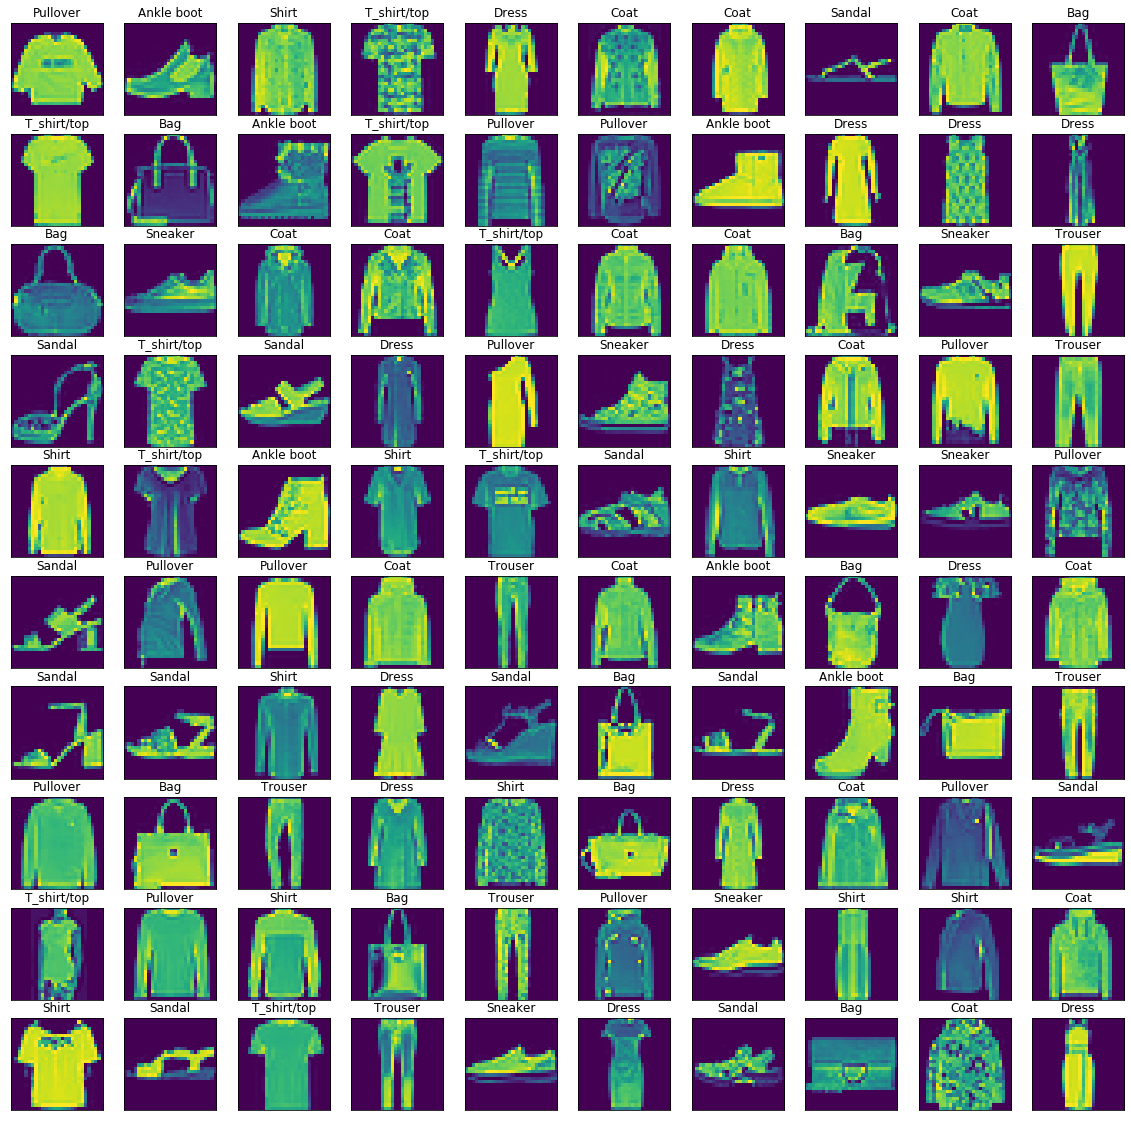

In [29]:
%matplotlib inline
#Visualize some samples
label_names = ["T_shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(label_names[label_index])
plt.show()

## Convolutional Neural Networks (CNN)

In [50]:
#Define the model
cnn_model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
# cnn_model.add(MaxPooling2D((2, 2)))
# # Add dropouts to the model
# cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(64, 
#              kernel_size=(3, 3), 
#              activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# # Add dropouts to the model
# cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
# # Add dropouts to the model
# cnn_model.add(Dropout(0.4))
# cnn_model.add(Flatten())
# cnn_model.add(Dense(128, activation='relu'))
# # Add dropouts to the model
# cnn_model.add(Dropout(0.3))
# cnn_model.add(Dense(10, activation='softmax'))


In [31]:
#Reshape image train array and image test array
#image_train = image_train.reshape(image_train.shape[0],*(28,28,1))
#image_test = image_test.reshape(image_test.shape[0],*(28,28,1))
#image_validate = image_validate.reshape(image_validate.shape[0],*(28,28,1))

In [32]:
#Compile the model
cnn_model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [33]:
#Train the model
# history = cnn_model.fit(image_train, label_train, batch_size=4096,
#     epochs=75,
#     verbose=1,
#     validation_data=(image_validate,label_validate),)

history = cnn_model.fit(x_train, y_train,
                  batch_size=128,
                  epochs=50,
                  verbose=1)

Epoch 1/50
60000/60000 [==============================] - 19s 324us/sample - loss: 0.5879 - acc: 0.7907
Epoch 2/50
60000/60000 [==============================] - 19s 316us/sample - loss: 0.3758 - acc: 0.8643
Epoch 3/50
60000/60000 [==============================] - 19s 322us/sample - loss: 0.3288 - acc: 0.8809
Epoch 4/50
60000/60000 [==============================] - 19s 316us/sample - loss: 0.3021 - acc: 0.8906
Epoch 5/50
60000/60000 [==============================] - 19s 318us/sample - loss: 0.2783 - acc: 0.8998
Epoch 6/50
60000/60000 [==============================] - 19s 318us/sample - loss: 0.2631 - acc: 0.9052
Epoch 7/50
60000/60000 [==============================] - 19s 322us/sample - loss: 0.2444 - acc: 0.9096
Epoch 8/50
60000/60000 [==============================] - 19s 324us/sample - loss: 0.2299 - acc: 0.9165
Epoch 9/50
60000/60000 [==============================] - 19s 322us/sample - loss: 0.2181 - acc: 0.9203
Epoch 10/50
60000/60000 [==============================] - 19s 3

In [34]:
cnn_model.evaluate(x_test, y_test, verbose=0)

[0.5743201209925115, 0.9114]

Text(0.5, 1.0, 'Train - Accuracy')

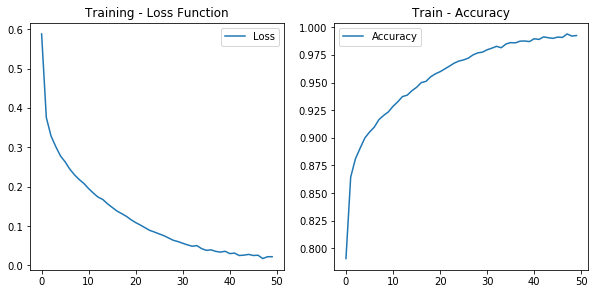

In [37]:
#Plot Training Accuracy vs Loss
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='Accuracy')
#plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [39]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.5743 - acc: 0.9114

Test accuracy: 0.9114


In [48]:
cnn_model.save("cnn_model.h5")